# **Import Libraries**

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import mode
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# **Implementation**

In [2]:
class KNN:
    def __init__(self, k):
        """
        Parameters
        ----------
        k: Number of neighbors. It is a hyperparameter that can be tuned
            int
        X: Features tensor
            Torch tensor
        """
        self.k = k

    def distance(self, x1, x2, metric = "euclidean", p = 2):
        metric_list = ["euclidean", "manhattan", "minkowski"]
        if metric == "euclidean":
            return torch.norm(x1 - x2, 2, 0)
        elif metric == "manhattan":
            return torch.sum(torch.abs(x1 - x2))
        elif metric == "minkowski":
            return torch.pow(torch.sum(torch.abs(x1- x2)**p), 1/p)
        else:
            raise ValueError(f"Unknown similarity distance metric. Should be from {metric_list}")

    def fit_predict(self, X, y, X_new):
        """
        Perfroming an iterative scheme using the concept of nearest neigbors.
        For each data point, we do the following steps:
        + Compute the distance between all training data and the new coming data using distance metric
        + Sort the distance and retrieve the indices
        + Find the majority class whose distance is closest to each X_new

        Parameters
        ----------
        X: Training data
            Torch tensor
        y: Ground truth label
            Torch tensor
        X_new: Data need to be classified
            Torch tensor

        Returns
        -------
        Predicted labels
        """
        y_pred = []
        for x_new in X_new:
            distances = []
            for i in range(X.shape[0]):
                dist = self.distance(X[i, :], x_new)
                distances.append(dist)

            distances = torch.tensor(distances)
            k_neighbors = torch.argsort(distances)[:self.k]
            y_label = y[k_neighbors]
            major_class = mode(y_label, keepdims = True)
            major_class = major_class.mode[0]
            y_pred.append(major_class)

        return torch.tensor(y_pred)


def tune_parameter(model, X, y, X_new, y_new, ks):
  acc = []
  y_test = y_new
  for i in range(1, ks):
    knn = model(k=i)
    y_pred = knn.fit_predict(X, y, X_new)
    acc.append(accuracy_score(y_test, y_pred))

  return np.array(acc)

# **Results**

In [4]:
iris = load_iris()
X = torch.tensor(iris.data)
y = torch.tensor(iris.target)
torch.manual_seed(0)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
knn = KNN(k=5)
y_pred = knn.fit_predict(x_train, y_train, x_test)

In [11]:
print(f'Accuracy: {100 * int(accuracy_score(y_test, y_pred))}%')

Accuracy: 100%


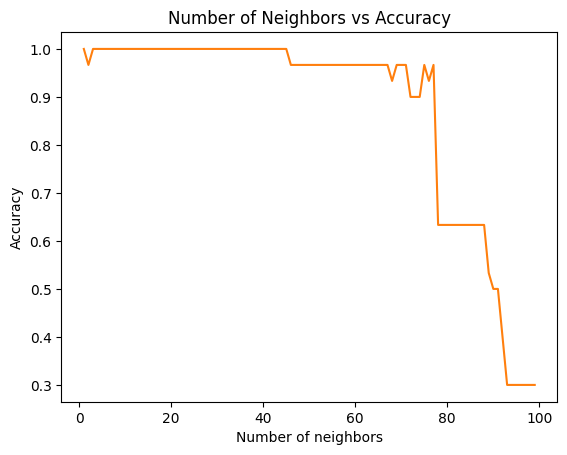

In [7]:
acc_grid = tune_parameter(KNN, x_train, y_train, x_test, y_test, 100)
x = np.arange(1, 100)
y = acc_grid

plt.plot(x, y, color="tab:orange")
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.title('Number of Neighbors vs Accuracy')
plt.show()